## Image Processing of Images using statistic models:

### Problem statement:Here the project is about identification and classification of a Images with a Bird in it and Images without a Bird¶

In [1]:
#Libraries used from python
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Model building:Logistic regression model

In [2]:
BirdClass = pd.read_csv("ad.csv")#Reading the data from csv 

In [3]:
BirdClass.head()#df with 26 columns ie, 24 features and index,Bird columns

,Unnamed: 0,vaxO,vayO,ccO,dataO,angelO1,angelO2,vaxL,vayL,ccL,...,dataS,angelS1,angelS2,vaxC,vayC,ccC,dataC,angelC1,angelC2,Bird
0,0,4078.708350,4125.643753,0.007304,29.964611,1.117610,-0.453186,0.00,0.0,0.0,...,-114.656411,-1.088904,0.481892,0.000000,0.000000,0.000000,0.000000,1.570796,0.000000,0
1,1,4156.247006,4110.378317,-0.002478,-10.242732,-0.210007,1.360790,0.00,0.0,0.0,...,-463.293186,-0.769036,0.801761,3213.331251,1862.528747,-0.449485,-1100.197930,-0.509997,1.060800,1
2,2,4239.323090,4326.662380,-0.028910,-123.821765,-0.954937,0.615859,0.00,0.0,0.0,...,-102.518128,-1.255879,0.314917,0.000000,0.000000,0.000000,0.000000,1.570796,0.000000,0
3,3,3924.347365,4275.795990,-0.005589,-22.896286,-1.506016,0.064780,2.25,4.0,-1.0,...,-248.153282,-1.348747,0.222050,253.895377,108.067934,0.218678,36.442278,0.230538,-1.340259,1
4,4,4052.216912,4040.365277,0.004660,18.856181,0.633147,-0.937650,0.00,0.0,0.0,...,4.182250,0.135803,-1.434994,2941.042725,2002.765625,-0.995906,-2455.406746,-0.689542,0.881254,0


In [4]:
BirdClass.info()#Gives us the complete details about df above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
Unnamed: 0    200 non-null int64
vaxO          200 non-null float64
vayO          200 non-null float64
ccO           200 non-null float64
dataO         200 non-null float64
angelO1       200 non-null float64
angelO2       200 non-null float64
vaxL          200 non-null float64
vayL          200 non-null float64
ccL           200 non-null float64
dataL         200 non-null float64
angelL1       200 non-null float64
angelL2       200 non-null float64
vaxS          200 non-null float64
vayS          200 non-null float64
ccS           200 non-null float64
dataS         200 non-null float64
angelS1       200 non-null float64
angelS2       200 non-null float64
vaxC          200 non-null float64
vayC          200 non-null float64
ccC           200 non-null float64
dataC         200 non-null float64
angelC1       200 non-null float64
angelC2       200 non-null float64
Bird          200 non-

In [5]:
corr=BirdClass.corr()#Checking for correlation between all the features
corr


,Unnamed: 0,vaxO,vayO,ccO,dataO,angelO1,angelO2,vaxL,vayL,ccL,...,dataS,angelS1,angelS2,vaxC,vayC,ccC,dataC,angelC1,angelC2,Bird
Unnamed: 0,1.000000,0.043746,-0.108927,0.033241,0.034353,0.083994,-0.013422,0.094344,0.093610,0.054685,...,0.038138,0.017037,-0.056706,0.121970,0.133917,0.007667,0.042961,-0.121604,-0.024823,0.008660
vaxO,0.043746,1.000000,0.051364,-0.071365,-0.062335,-0.040584,0.042547,-0.073240,-0.071122,-0.156964,...,-0.146717,-0.159514,0.113076,-0.047469,-0.098000,0.068232,0.068224,0.054304,0.018117,-0.030933
vayO,-0.108927,0.051364,1.000000,-0.141790,-0.140060,-0.089338,-0.087446,0.247165,0.248256,-0.151128,...,-0.077444,-0.089805,0.043364,0.000747,0.186597,0.008786,0.078092,0.063621,0.047400,-0.078106
ccO,0.033241,-0.071365,-0.141790,1.000000,0.999329,0.599596,-0.623766,-0.068502,-0.010359,0.009675,...,0.801487,0.514502,-0.547960,-0.094469,-0.054343,-0.105330,-0.031171,0.124216,0.031650,0.011530
dataO,0.034353,-0.062335,-0.140060,0.999329,1.000000,0.593645,-0.626517,-0.068404,-0.011574,0.006607,...,0.799373,0.511711,-0.549440,-0.093107,-0.056062,-0.105916,-0.030509,0.123945,0.031839,0.011272
angelO1,0.083994,-0.040584,-0.089338,0.599596,0.593645,1.000000,-0.559269,-0.013710,-0.040385,0.051960,...,0.496438,0.475449,-0.458381,-0.044543,0.052663,-0.098823,-0.037902,0.072845,0.023109,0.010321
angelO2,-0.013422,0.042547,-0.087446,-0.623766,-0.626517,-0.559269,1.000000,-0.031510,-0.036515,-0.034400,...,-0.500954,-0.443652,0.562356,0.054958,-0.004455,0.142256,0.074001,-0.041235,0.000563,-0.028764
vaxL,0.094344,-0.073240,0.247165,-0.068502,-0.068404,-0.013710,-0.031510,1.000000,0.797271,-0.079612,...,-0.133819,-0.092461,0.094281,0.435319,0.496050,-0.135576,-0.246152,-0.317560,0.059882,0.157207
vayL,0.093610,-0.071122,0.248256,-0.010359,-0.011574,-0.040385,-0.036515,0.797271,1.000000,-0.083791,...,-0.094764,-0.035613,0.071694,0.349233,0.520186,-0.083313,-0.156246,-0.264013,0.089364,0.186156
ccL,0.054685,-0.156964,-0.151128,0.009675,0.006607,0.051960,-0.034400,-0.079612,-0.083791,1.000000,...,0.002914,0.122779,-0.028336,0.035465,0.031419,0.145464,0.261295,0.169072,-0.202930,-0.087466


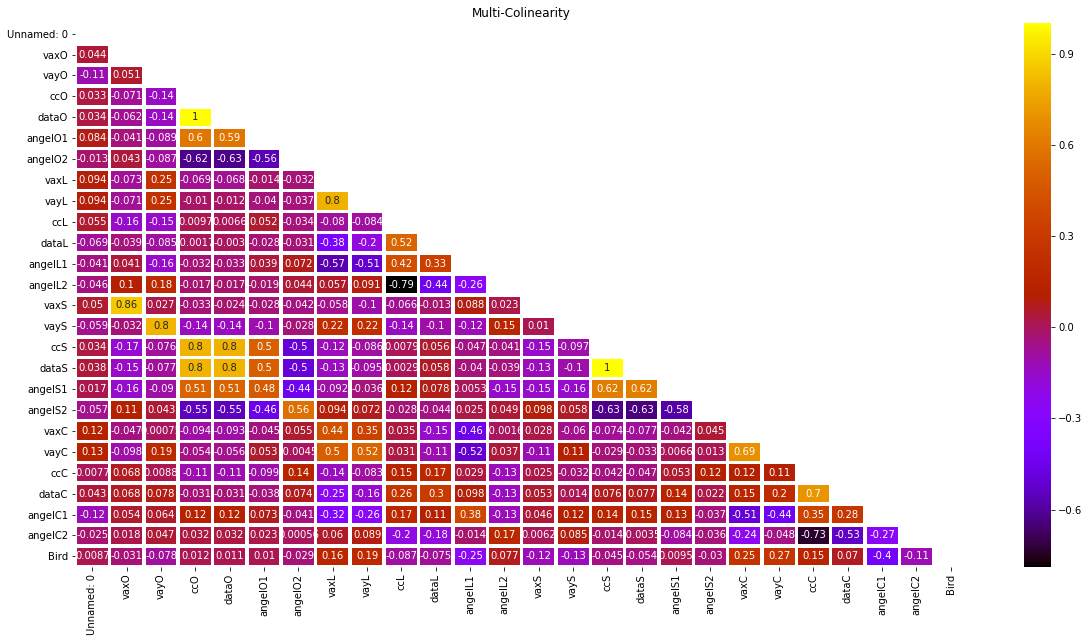

In [6]:
#Heat map for  multi-colinearity check
plt.figure(figsize=(20,10)) 
corr= BirdClass.corr() 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True 
sns.heatmap(corr,linewidths=2.5,mask=mask,cmap='gnuplot',annot=True) 
plt.title('Multi-Colinearity') 
plt.show()

In [7]:
BirdClass.keys()#obtains all  features names 

Index(['Unnamed: 0', 'vaxO', 'vayO', 'ccO', 'dataO', 'angelO1', 'angelO2',
       'vaxL', 'vayL', 'ccL', 'dataL', 'angelL1', 'angelL2', 'vaxS', 'vayS',
       'ccS', 'dataS', 'angelS1', 'angelS2', 'vaxC', 'vayC', 'ccC', 'dataC',
       'angelC1', 'angelC2', 'Bird'],
      dtype='object')

In [8]:
X=BirdClass[['vaxO', 'vayO', 'ccO', 'dataO', 'angelO1', 'angelO2','vaxL', 'vayL', 'ccL', 'dataL', 'angelL1', 'angelL2','vaxS', 'vayS','ccS', 'dataS', 'angelS1', 'angelS2',
    'vaxC', 'vayC', 'ccC', 'dataC','angelC1', 'angelC2']]
y=BirdClass['Bird']

## Features selection process :

### 1. VIF:variance_inflation_factor

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF

In [11]:
X.head()

,vaxO,vayO,ccO,dataO,angelO1,angelO2,vaxL,vayL,ccL,dataL,...,ccS,dataS,angelS1,angelS2,vaxC,vayC,ccC,dataC,angelC1,angelC2
0,4078.708350,4125.643753,0.007304,29.964611,1.117610,-0.453186,0.00,0.0,0.0,0.0,...,-0.027840,-114.656411,-1.088904,0.481892,0.000000,0.000000,0.000000,0.000000,1.570796,0.000000
1,4156.247006,4110.378317,-0.002478,-10.242732,-0.210007,1.360790,0.00,0.0,0.0,0.0,...,-0.121853,-463.293186,-0.769036,0.801761,3213.331251,1862.528747,-0.449485,-1100.197930,-0.509997,1.060800
2,4239.323090,4326.662380,-0.028910,-123.821765,-0.954937,0.615859,0.00,0.0,0.0,0.0,...,-0.023735,-102.518128,-1.255879,0.314917,0.000000,0.000000,0.000000,0.000000,1.570796,0.000000
3,3924.347365,4275.795990,-0.005589,-22.896286,-1.506016,0.064780,2.25,4.0,-1.0,-6.0,...,-0.063051,-248.153282,-1.348747,0.222050,253.895377,108.067934,0.218678,36.442278,0.230538,-1.340259
4,4052.216912,4040.365277,0.004660,18.856181,0.633147,-0.937650,0.00,0.0,0.0,0.0,...,0.001026,4.182250,0.135803,-1.434994,2941.042725,2002.765625,-0.995906,-2455.406746,-0.689542,0.881254


In [12]:
from sklearn.preprocessing import StandardScaler #It will Standardize features by removing the mean and scaling to unit variance. 
#The standard score of a sample x is calculated as: z = (x - u) / s

In [13]:
sc = StandardScaler()# converted all x values to z-score values

In [14]:
X_z = sc.fit_transform(X)#stored to  x_z

In [15]:
#detects multicollinearity in regression analysis
vif = pd.DataFrame()#creating new dataframe to stores vif values
vif["VIF"]= [variance_inflation_factor(X_z,i) for i in range(X_z.shape[1])]#X_z.shape[1]-- it will gives the rows,columns count
                                                                                #[1]--columns[0]--rows
vif["features"] = X.columns


In [16]:
vif     #vif>5 are considered highly correlated

,VIF,features
0,5.009003,vaxO
1,3.279634,vayO
2,1178.641850,ccO
3,1163.468727,dataO
4,2.088546,angelO1
5,2.419673,angelO2
6,4.520337,vaxL
7,3.496466,vayL
8,4.531458,ccL
9,1.995124,dataL


# Splitting data into train data,test data:

In [17]:
 #Split arrays or matrices into random train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)#test_size gives us the splitting of data percentageslike 
                                                                                    #0.2--20%test data,80%train data
print('x_train =',x_train.shape)#.shape shows the rows and columns
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (160, 24)
x_test = (40, 24)
y_train = (160,)
y_test = (40,)


In [18]:
#creating a new data frames for splitted data
train = pd.concat((x_train,y_train),axis=1)
test = pd.concat((x_test,y_test),axis=1)

In [19]:
from sklearn.linear_model import LogisticRegression 
logmodel = LogisticRegression()  
logmodel.fit(x_train,y_train)# fit a binary logistic regression
#Recursive feature elimination---based on Feature ranking  
from sklearn.feature_selection import RFE

c:\users\subbaramireddy\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
selector = RFE(logmodel)   #applying RFE to logistic regression
selector.fit(x_train,y_train)  

c:\users\subbaramireddy\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\subbaramireddy\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\subbaramireddy\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\subbaramireddy\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\subbaramireddy\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=None, step=1, verbose=0)

In [21]:
selector.ranking_#ranking method for all features

array([ 3, 10,  1,  1,  1,  1,  7,  8,  1,  6,  1,  1,  4,  9,  1,  2,  5,
        1, 12, 13,  1, 11,  1,  1])

In [22]:
X.columns[selector.support_]# It will give all 1st ranked features

Index(['ccO', 'dataO', 'angelO1', 'angelO2', 'ccL', 'angelL1', 'angelL2',
       'ccS', 'angelS2', 'ccC', 'angelC1', 'angelC2'],
      dtype='object')

##### Creating a new dataframe after features selection is done

In [23]:
BirdClass1= X[X.columns[selector.support_]]#it will create a df with all obtained features
BirdClass1.head()

,ccO,dataO,angelO1,angelO2,ccL,angelL1,angelL2,ccS,angelS2,ccC,angelC1,angelC2
0,0.007304,29.964611,1.117610,-0.453186,0.0,1.570796,0.000000,-0.027840,0.481892,0.000000,1.570796,0.000000
1,-0.002478,-10.242732,-0.210007,1.360790,0.0,1.570796,0.000000,-0.121853,0.801761,-0.449485,-0.509997,1.060800
2,-0.028910,-123.821765,-0.954937,0.615859,0.0,1.570796,0.000000,-0.023735,0.314917,0.000000,1.570796,0.000000
3,-0.005589,-22.896286,-1.506016,0.064780,-1.0,-0.927295,0.643501,-0.063051,0.222050,0.218678,0.230538,-1.340259
4,0.004660,18.856181,0.633147,-0.937650,0.0,1.570796,0.000000,0.001026,-1.434994,-0.995906,-0.689542,0.881254


In [24]:
#Splitting new data obtained 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(BirdClass1,y,test_size=0.2,random_state=0)
print('x_train =',x_train.shape)
print('x_test =',x_test.shape)
print('y_train =',y_train.shape)
print('y_test =',y_test.shape)

x_train = (160, 12)
x_test = (40, 12)
y_train = (160,)
y_test = (40,)


##### Applying logistic regressiion:

In [25]:
from scipy.stats import chi2#

In [26]:
degreeoffreedom = 140-1-(21-1)

In [27]:
#Creating a new Logistic model for our new data
model = sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()#logistic belongs to binomial family i;e normal distribution
print(model.summary())
#we have calculate below values to know our model perform.
print('INFO: Null deviance =',model.null_deviance)
print('INFO: Residual deviance =',model.deviance)
print('INFO: Critical Value of chi2 =',chi2.ppf(0.95,degreeoffreedom))
print('INFO: Pearson chi2 =',model.pearson_chi2)
print('INFO: P-value chi2 =',1-chi2.cdf(model.pearson_chi2,degreeoffreedom))
print('INFO: AIC =',model.aic)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Bird   No. Observations:                  160
Model:                            GLM   Df Residuals:                      148
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -86.326
Date:                Mon, 08 Apr 2019   Deviance:                       172.65
Time:                        14:37:18   Pearson chi2:                     167.
No. Iterations:                     4   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ccO          193.8157    125.300      1.547      0.122     -51.767     439.398
dataO         -0.0405      0.030     -1.359      0.1

##### probability values prediction:

In [28]:
#This function will replaces the probability values with 0's and 1's
def probreplace(y):#Here y is the function variable is called when ever required
    if y >= 0.5:
        return 1
    else:
        return 0

In [29]:
#gives the predicted probability values for train and test data and storing in new variables
y_train_prob = model.predict(x_train)
y_test_prob = model.predict(x_test)
#Applying the above function to replace prob values and storing in new variables
y_pred_train= y_train_prob.apply(probreplace)
y_pred_test = y_test_prob.apply(probreplace)

In [30]:
#A  ConfusionMatrix is a table that is often used to describe the performance of a  model
from pandas_ml import ConfusionMatrix   
cm_train = ConfusionMatrix(y_train,y_pred_train)
cm_test = ConfusionMatrix(y_test,y_pred_test)

In [31]:
print('INFO: Confusion Matrix for Traning Data \n\n',cm_train,'\n\n')
print('INFO: Confusion Matrix for Testing Data \n\n',cm_test)

INFO: Confusion Matrix for Traning Data 

 Predicted  False  True  __all__
Actual                         
False         67    13       80
True          27    53       80
__all__       94    66      160 


INFO: Confusion Matrix for Testing Data 

 Predicted  False  True  __all__
Actual                         
False         15     5       20
True          10    10       20
__all__       25    15       40


In [32]:
print('For Traning Data')#gives overall performance of a model
cm_train.stats_overall

For Traning Data


c:\users\subbaramireddy\python\lib\site-packages\pandas_ml\confusion_matrix\stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2


OrderedDict([('Accuracy', 0.75),
             ('95% CI', (0.675501931544241, 0.8149979722038647)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 1.2608063017183748e-05),
             ('Kappa', 0.5),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [33]:
print('For Testing Data')
cm_test.stats_overall

For Testing Data


OrderedDict([('Accuracy', 0.625),
             ('95% CI', (0.45801475223261096, 0.772737277518174)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.5699840106352669),
             ('Kappa', 0.25),
             ("Mcnemar's Test P-Value", 'ToDo')])

#### FROM above overall results the our model is not so good at p-value 0.5 ,so go for ROC curve 

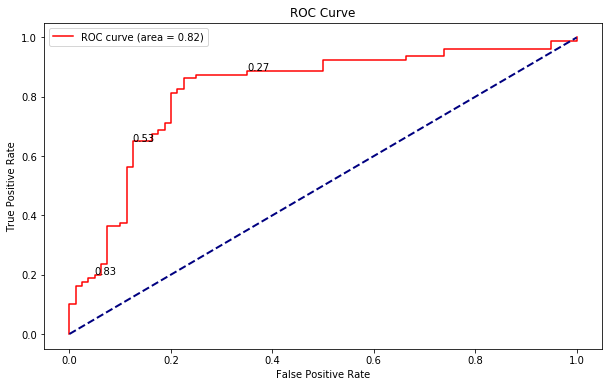

In [34]:
#Computes Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold = roc_curve(y_train,y_train_prob)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='red',lw=1.5)
plt.plot([0, 1], [0, 1], color='navy',lw = 2, linestyle='--')

for i,value in enumerate(fpr*10):
    try:
        if (round(fpr[i+1]*10) - round(fpr[i]*10)) == 1:
            plt.text(fpr[i],tpr[i],'%0.2f'%(threshold[i]))
    except IndexError:
        print(' ')
        
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(['ROC curve (area = %0.2f)' % auc(fpr,tpr)])
plt.show()

In [35]:
#Based on ROC we selected new thresh hold value:
def probreplace(y):#Here y is the function variable called when ever it is called
    if y >= 0.33:
        return 1
    
    else:
        return 0

In [36]:
y_train_prob = model.predict(x_train)
y_test_prob = model.predict(x_test)

y_pred_train= y_train_prob.apply(probreplace)
y_pred_test= y_test_prob.apply(probreplace)

In [37]:
from pandas_ml import ConfusionMatrix
cm_train = ConfusionMatrix(y_train,y_pred_train)
cm_test = ConfusionMatrix(y_test,y_pred_test)

In [38]:
print('INFO: Confusion Matrix for Traning Data \n\n',cm_train,'\n\n')
print('INFO: Confusion Matrix for Testing Data \n\n',cm_test)

INFO: Confusion Matrix for Traning Data 

 Predicted  False  True  __all__
Actual                         
False         62    18       80
True          12    68       80
__all__       74    86      160 


INFO: Confusion Matrix for Testing Data 

 Predicted  False  True  __all__
Actual                         
False         12     8       20
True           7    13       20
__all__       19    21       40


In [39]:
print('For Traning Data')
cm_train.stats_overall

For Traning Data


OrderedDict([('Accuracy', 0.8125),
             ('95% CI', (0.7432805178237601, 0.8697741911656713)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 2.9773239806138183e-13),
             ('Kappa', 0.625),
             ("Mcnemar's Test P-Value", 'ToDo')])

In [40]:
print('For Testing Data')
cm_test.stats_overall

For Testing Data


OrderedDict([('Accuracy', 0.625),
             ('95% CI', (0.45801475223261096, 0.772737277518174)),
             ('No Information Rate', 'ToDo'),
             ('P-Value [Acc > NIR]', 0.13365981337266575),
             ('Kappa', 0.25),
             ("Mcnemar's Test P-Value", 'ToDo')])

#### Now at p-value 0.33 our model accuracy is 81% which imples a good model,kappa score is 0.62 which tells us substantialgood model